<a href="https://colab.research.google.com/github/Muhammad-Gunzalas/Machine-Learning-with-K-Nearest-Neighbor/blob/main/Assignment_KNN_Implementation_on_Abalone_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [102]:
import pandas as pd
import scipy.stats
import numpy as np
import sklearn.metrics as sk
from matplotlib import pyplot as plot

**Read Dataset**

In [103]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(url, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Assigning columns names**

In [104]:
# Assigning names to columns
abalone.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight","Viscera weight", "Shell weight", "Rings"]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Dropping the Sex Column**

In [105]:
# Dropping sex column as it is non-numeric and irrelevant
abalone = abalone.drop('Sex', axis=1)
abalone.shape

(4177, 8)

**Data Splitting With Numpy**

In [106]:
# Splitting with numpy 
# For shuffling the dataset
# abalone = abalone.sample(frac=1)

# For splitting data into 3 sets training, validation, and testing
validation_data, testing_data, training_data = np.split(abalone, [int(.2 * len(abalone)), int(.5 * len(abalone))])
#training_data, validation_data, testing_data = np.split(abalone, [int(.5 * len(abalone)), int(.7 * len(abalone))])

# Extract all features except "Rings" or Output column into one array and
# Rings column in another array for all data sets
actual_training_data = training_data.drop('Rings', axis=1).values
training_data_rings = training_data["Rings"].values

actual_validation_data = validation_data.drop('Rings', axis=1).values
validation_data_rings = validation_data["Rings"].values


actual_testing_data = testing_data.drop('Rings', axis=1).values
testing_data_rings = testing_data["Rings"].values

actual_training_data.shape , training_data_rings.shape , actual_validation_data.shape , validation_data_rings.shape , actual_testing_data.shape , testing_data_rings.shape

((2089, 7), (2089,), (835, 7), (835,), (1253, 7), (1253,))

**Data Splitting With Sklearn Library** if you already run Upper cell don't Run this otherwise values updated

In [114]:
# Split with sklearn library , this cell on option don't run if you run upper cell otherwise your values are update
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

from sklearn.model_selection import train_test_split 
# Set aside 70% of train and 30%test data for evaluation
X_train,  y_train = train_test_split(X,test_size=0.3, shuffle = True )
x_test,  y_test = train_test_split(y,test_size=0.3, shuffle = True )


# Use the same funcion above for the validation set
X_train, X_val = train_test_split(X_train, test_size=0.3, random_state= 8) 
x_test, y_val= train_test_split(x_test, test_size=0.3, random_state= 8)#

#X_train.shape ,x_test.shape ,X_val.shape ,y_val.shape ,y_train.shape ,y_test.shape

actual_training_data=X_train
training_data_rings=x_test
actual_validation_data=X_val
validation_data_rings=y_val
actual_testing_data=y_train
testing_data_rings=y_test

print('X_train shape: ',X_train.shape)
print('X_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)
print('X_val shape: ',X_val.shape)
print('y val shape: ',y_val.shape)

X_train shape:  (2046, 7)
X_test shape:  (2046,)
y_train shape:  (1254, 7)
y_test shape:  (1254,)
X_val shape:  (877, 7)
y val shape:  (877,)


**KNN Code**

In [107]:
# this generic method will calculate the distance of one sample with actual data (training data) &
# get the K nearest distances and then predict the output class (Rings) and then store the predicted value into array.
# Parameters:-
# sample: one row from the data set
# actual_data: complete dataset from which we want to calculate the distance of our sample
# data_rings: actual output class of dataset(Rings in our case) from which we want to get classes of neighbors
# pred_ring: the array that will contain the predicted value of each sample
# k: the value of k; how much neighbors we want
def calculate_dis_pred(sample, actual_data, data_rings, pred_ring, k):
    distances = (np.linalg.norm(actual_data - sample, axis=1))
    nearest_neighbor_ids = distances.argsort()[:k]
    nearest_neighbor_rings = data_rings[nearest_neighbor_ids]
    # print(scipy.stats.mode(nearest_neighbor_rings))
    prediction = scipy.stats.mode(nearest_neighbor_rings)[0][0]

    pred_ring.append(prediction)



**Calculations**

In [108]:

# This generic method will calculate the Accuracy, Precision, Recall, and F1 Score of specific k value.
# Parameters:-
# k: no. of neighbors
# data_set: dataset from which we want to make calculations
# data_set_rings: actual output class of that given data_set
# _type: to specify the type of data_set
def get_calculation(k, data_set, data_set_rings, _type):
    data_pred = []
    for sample in data_set:
        calculate_dis_pred(sample, data_set, data_set_rings, data_pred, k)

    accuracy = sk.accuracy_score(data_set_rings, data_pred)
    recall = sk.recall_score(data_set_rings, data_pred, average='weighted')
    precision = sk.precision_score(data_set_rings, data_pred, average='weighted')
    f1 = sk.f1_score(data_set_rings, data_pred, average='weighted')

    print_result(_type,accuracy,precision,recall,f1)


    



**Calculations Print**

In [109]:
def print_result(_type,accuracy,precision,recall,f1):
    print('-----------Calculation On K = ',k,'------------')
    print('On ',_type,' Data:')
    print('Accuracy on K = ',k,' is ',accuracy)
    print('Precision on K =',k,' is ',precision)
    print('Recall on K = ',k,' is ',recall)
    print('F1 Score on K = ',k,' is ',f1)

**Create Dictionary for Storing Results**

In [110]:
# initializing empty dictionary for storing each data set accuracies
k_training_accuracy_dict = {}
k_validation_accuracy_dict = {}
k_testing_accuracy_dict = {}

**Plotting Data**

In [111]:


def plot_accuracy_graph():
    plot.title('Training Accuracy vs Testing Accuracy')
    plot.xlabel('n_neighbor')
    plot.ylabel('Accuracy')

    # As we have accuracy on y-axis, so it takes values from the dictionary
    # As we have k (n_neighbors) on x-axis, so it takes keys from dictionary because keys are the value of k
    # Called a built-in method that take x and y axis
    # first argument is x-axis (k-values) and second is y-axis (accuracies)
    # this is for training dataset
    plot.plot(list(k_training_accuracy_dict.keys()), list(k_training_accuracy_dict.values()),label='Training Accuracy')

    # this is for validation dataset
    #plot.plot(list(k_validation_accuracy_dict.keys()),  list(k_validation_accuracy_dict.values()),label='Validation Accuracy')

    # this is for testing dataset
    plot.plot(list(k_testing_accuracy_dict.keys()), list(k_testing_accuracy_dict.values()),label='Testing Accuracy')
    plot.legend(loc='best')
    plot.show()



**Part 1**

In [112]:
#  ********** Part - 1 **************
# Loop to find the tuned value of k, in this loop, for each value of k, it will find the predicted value of each
# sample of each dataset and after that find the accuracy of predicted classes with actual classes and store it
# in the dictionary with the key k
for k in range(1, 100, 2):
    pred_training_rings = []
    pred_validation_rings = []
    pred_testing_rings = []
    for training_sample in actual_training_data:
        calculate_dis_pred(training_sample, actual_training_data, training_data_rings, pred_training_rings, k)
    k_training_accuracy_dict[k] = sk.accuracy_score(training_data_rings, pred_training_rings)

    for v_sample in actual_validation_data:
        calculate_dis_pred(v_sample, actual_training_data, training_data_rings, pred_validation_rings, k)
    k_validation_accuracy_dict[k] = sk.accuracy_score(validation_data_rings, pred_validation_rings)

    for test_sample in actual_testing_data:
        calculate_dis_pred(test_sample, actual_training_data, training_data_rings, pred_testing_rings, k)
    k_testing_accuracy_dict[k] = sk.accuracy_score(testing_data_rings, pred_testing_rings)




**Part - 2 and Part - 3 Part -4**

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------Calculation On K =  17 ------------
On  training  Data:
Accuracy on K =  17  is  0.3432264241263763
Precision on K = 17  is  0.32539592847018284
Recall on K =  17  is  0.3432264241263763
F1 Score on K =  17  is  0.31992408054984817


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------Calculation On K =  17 ------------
On  testing  Data:
Accuracy on K =  17  is  0.41500399042298486
Precision on K = 17  is  0.40356480488009894
Recall on K =  17  is  0.41500399042298486
F1 Score on K =  17  is  0.4000314235501056


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------Calculation On K =  19 ------------
On  training  Data:
Accuracy on K =  19  is  0.34035423647678315
Precision on K = 19  is  0.32562726119838653
Recall on K =  19  is  0.34035423647678315
F1 Score on K =  19  is  0.3158947743612655


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------Calculation On K =  19 ------------
On  testing  Data:
Accuracy on K =  19  is  0.4221867517956903
Precision on K = 19  is  0.40549471901192524
Recall on K =  19  is  0.4221867517956903
F1 Score on K =  19  is  0.4033846796042184


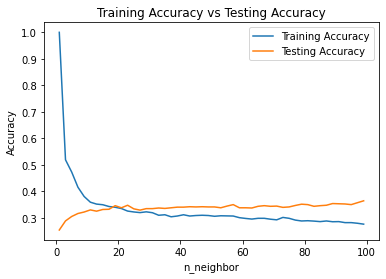

In [113]:
#  ********** Part - 2 and Part - 3 **************
# As we got best result at k = 18.2642 and that is even number so we take 17 and 19
# odd number to check the calculations
k = 17
get_calculation(k, actual_training_data, training_data_rings, 'training')
get_calculation(k, actual_testing_data, testing_data_rings, 'testing')

k = 19
get_calculation(k, actual_training_data, training_data_rings, 'training')
get_calculation(k, actual_testing_data, testing_data_rings, 'testing')

#********** Part - 4 **************
plot_accuracy_graph()